In [106]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from itertools import permutations
%matplotlib inline

In [107]:
A = [[0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0]]
# A = [[1, 1, 0, 0, 1, 0, 0, 0], #spectrum
#      [1, 0, 1, 0, 1, 0, 0, 0],
#      [0, 1, 0, 1, 0, 1, 0, 0],
#      [0, 0, 1, 0, 1, 1, 0, 0],
#      [1, 1, 0, 0, 0, 1, 0, 0],
#      [0, 1, 1, 0, 1, 0, 0, 0],
#      [0, 1, 0, 1, 0, 0, 0, 1],
#      [0, 0, 1, 1, 0, 0, 0, 1]]

B = [[0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 1, 0],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 1],
    [0, 0, 0, 1, 1, 0, 1, 0]]

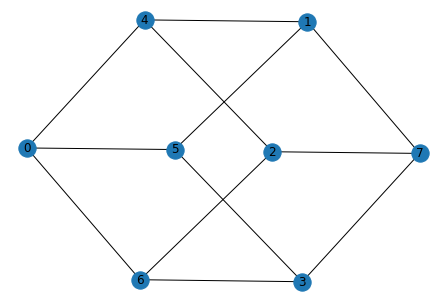

In [108]:
G = nx.from_numpy_matrix(np.matrix(A))
nx.draw(G, with_labels = True)
plt.show()

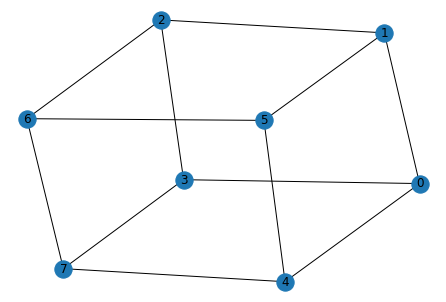

In [109]:
H = nx.from_numpy_matrix(np.matrix(B))
nx.draw(H, with_labels=True)
plt.show()

In [110]:
G_degree_values = dict(G.degree()).values()
H_degree_values = dict(H.degree()).values()
G_spectrum = nx.adjacency_spectrum(G)
H_spectrum = nx.adjacency_spectrum(H)
n = len(G.nodes())
m = len(H.nodes())

def isomorphism(G, H):
    if n != m:
        return print("Graphs are isomorphic:", False, "because the dimension didn't match")
    
    if ((G_spectrum) != (H_spectrum)).all():
        return print("Graphs are isomorphic:", False, "because the spectrum didn't match")
    
    if (sorted(G_degree_values) != sorted(H_degree_values)):
        return print("Graphs are isomorphic:", False, "because the degrees of the vertices didn't match")
    else:
        A_g = nx.adjacency_matrix(G).todense()
        perms = list(permutations(H.nodes(), m))
        for i in perms:
            B_h = nx.adjacency_matrix(H,i).todense()
            if (B_h == A_g).all(): 
                print("The possible isomorphism:", list(zip(G.nodes(), i)))
                return print("Graphs are isomorphic:" , True)
        return print("Graphs are isomorphic:", False)

isomorphism(G,H)

The possible isomorphism: [(0, 0), (1, 2), (2, 5), (3, 7), (4, 1), (5, 3), (6, 4), (7, 6)]
Graphs are isomorphic: True


In [111]:
def automorphism(G):
    A_g = nx.adjacency_matrix(G).todense()
    perms = list(permutations(G.nodes(), n))
    print("Aut(G):")
    for i in perms:
        A_g_i = nx.adjacency_matrix(H,i).todense()
        if (A_g_i == A_g).all(): 
            print(list(zip(G.nodes(), i)))
            
automorphism(G)

Aut(G):
[(0, 0), (1, 2), (2, 5), (3, 7), (4, 1), (5, 3), (6, 4), (7, 6)]
[(0, 0), (1, 2), (2, 7), (3, 5), (4, 3), (5, 1), (6, 4), (7, 6)]
[(0, 0), (1, 5), (2, 2), (3, 7), (4, 1), (5, 4), (6, 3), (7, 6)]
[(0, 0), (1, 5), (2, 7), (3, 2), (4, 4), (5, 1), (6, 3), (7, 6)]
[(0, 0), (1, 7), (2, 2), (3, 5), (4, 3), (5, 4), (6, 1), (7, 6)]
[(0, 0), (1, 7), (2, 5), (3, 2), (4, 4), (5, 3), (6, 1), (7, 6)]
[(0, 1), (1, 3), (2, 4), (3, 6), (4, 0), (5, 2), (6, 5), (7, 7)]
[(0, 1), (1, 3), (2, 6), (3, 4), (4, 2), (5, 0), (6, 5), (7, 7)]
[(0, 1), (1, 4), (2, 3), (3, 6), (4, 0), (5, 5), (6, 2), (7, 7)]
[(0, 1), (1, 4), (2, 6), (3, 3), (4, 5), (5, 0), (6, 2), (7, 7)]
[(0, 1), (1, 6), (2, 3), (3, 4), (4, 2), (5, 5), (6, 0), (7, 7)]
[(0, 1), (1, 6), (2, 4), (3, 3), (4, 5), (5, 2), (6, 0), (7, 7)]
[(0, 2), (1, 0), (2, 5), (3, 7), (4, 1), (5, 3), (6, 6), (7, 4)]
[(0, 2), (1, 0), (2, 7), (3, 5), (4, 3), (5, 1), (6, 6), (7, 4)]
[(0, 2), (1, 5), (2, 0), (3, 7), (4, 1), (5, 6), (6, 3), (7, 4)]
[(0, 2), (1, 5), 